# Make a map with the locations of the tide gauges and the salinity stations 

In [13]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio import plot as rasterplot
#from pyschism.mesh import Hgrid
#import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection
import geopandas as gpd
import re 
print("Modules imported!")


Modules imported!


In [14]:
# import rioxarray


In [15]:
# Basemap 
basemap = '/global/home/groups/fc_esdl/data/plotting/basemap_delta.tif'

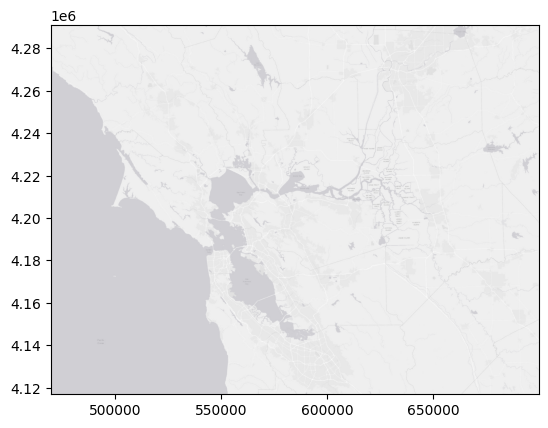

In [16]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

In [17]:
stations=gpd.read_file("/global/scratch/users/jennaisrael/Plotting/maps/shp_files/stations_stp/stations_stp.shp")

In [18]:
stations

,id,station_id,name,unit,param,lat,lon,geometry
0,1,pryc,Point Reyes,meters,elev,37.996000,-122.977000,POINT (502019.448 4205371.461)
1,2,mtyc1,Monterey,meters,elev,36.605000,-121.889000,POINT (599363.210 4051629.682)
2,3,jer,Jersey Point,microS/cm,ec,38.052166,-121.688987,POINT (615024.290 4212414.184)
3,4,hol2,Holland Cut near Bethel Island,microS/cm,ec,38.016389,-121.581944,POINT (624476.914 4208582.229)
4,5,frk,"Franks Tract, Mid Tract",microS/cm,ec,38.046420,-121.598100,POINT (623008.430 4211892.992)


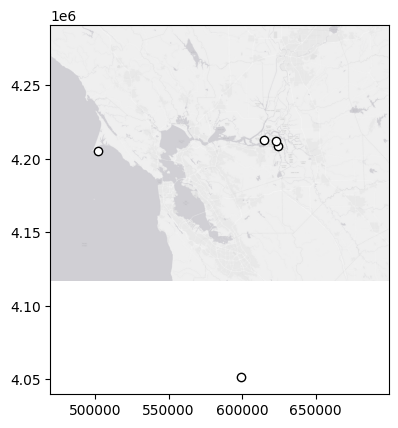

In [22]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

# plot shapefiles
stations.plot(ax=ax, facecolor='w', edgecolor='k')
#plt.savefig('test.jpg')
plt.show()


In [ ]:
#to use a different color and shape for each station need to index the stations and do this in a loop
# see https://stackoverflow.com/questions/45829228/select-specific-regions-of-shp-file-using-geopandas for boolean indexing and 
# see for plotting in a loop https://stackoverflow.com/questions/52303660/iterating-markers-in-plots/52303895#52303895

ValueError: Unrecognized marker style ['o', '^']

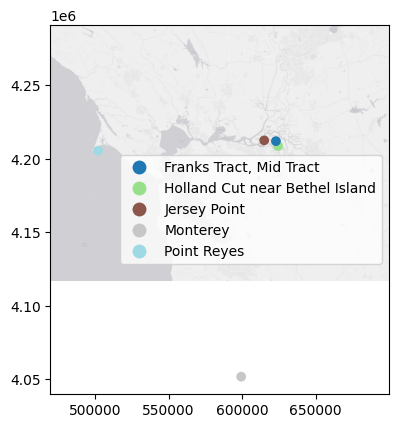

In [25]:
fig, ax = plt.subplots()
with rasterio.open(basemap) as src:
                    i = show(src, transform = src.transform, cmap='binary', ax = ax) 

# plot shapefiles
stations.plot(ax=ax, column='name',cmap='tab20',legend=True)
stations.plot(ax=ax, column='param',marker=['o','^'],legend=True)
#plt.savefig('test.jpg')
plt.legend()
plt.show()


In [ ]:
# station_fn = "/global/scratch/users/jennaisrael/run_schism/run_28/station.in"
# station_id =[]
# with open(station_fn) as f:
#     f.readline()
#     for station in range(int(f.readline())):
#         line = f.readline()
#         if '!' in line:
#             station_id.append(line.split('!')[-1])
#                     # else:
#                 #     station_id.append(None)

# stations = []
# for sublist in station_id:
#     match = re.search(r'"(.*?)"', sublist)
#     if match:
#         stations.append(match.group(1).strip())
#     else :
#         stations.append(sublist.replace("\n", "").strip())


# print("\nSTATION LIST:")
# for i, station in enumerate(stations):
#     print("#%d: %s" % (i,station))

In [ ]:
#166: Holland Cut at Holland Marina
#19: Jersey Point
#199: Franks Tract, Mid Tract


In [ ]:
station_file=pd.read_csv(station_fn)
station_file

In [ ]:
# UTM 10 projection system 
proj_utm10 = 'EPSG:26910'
